In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from scipy.stats import norm
from scipy.optimize import brentq
np.random.seed(10) #8 for 0.2 #10 for 0.4

In [ ]:
#One-factor LMM MC simulation
def One_factor_LMM(tau, Tenor, fwd_vol, N_sim):
    #Setup time index and tau
    M = int(Tenor/tau) #Number of steps
    print("M=", M)
    #Start forward rate (Calc first stem from f(0,T_i))
    FR_0 =  0.04 #constant
    #FR_0 =  0.02 + 0.0005 * np.arange(M) #increasing
    #FR_0 =  0.02 - 0.0005 * np.arange(num_steps-1) #decreasing
    print("FR_0=", FR_0)
    # Create a 3D array to store all simulation paths
    FR_mc = np.zeros((M, M, N_sim))
    for n in range(N_sim):
        if n % 1000 == 0:
            print("n=", n)
        
        FR=np.zeros((M,M)) #M=N=k+1
        FR[:,0] = FR_0 
        for t in range(M):#k=0,1,2,...,M thus M-1 forward rates
            dW=np.random.standard_normal()
            for k in range(t+1,M):#t<=T_k
                drift = -fwd_vol[k]* sum( tau  * fwd_vol[j]* FR[j][t] / (1 + tau * FR[j][t]) for j in range(k+1, M))
                FR[k][t+1]=FR[k][t]*np.exp((drift-0.5*(fwd_vol[k]**2))*tau + fwd_vol[k]*np.sqrt(tau)*dW)
                
        FR_mc[:, :, n] = FR #consider makeing it 3 dimensional to save the individual paths and not only the mean

    return FR_mc
timetoend = 24#11#
lenlibor = timetoend-1
tau = 1

FR_vol = np.zeros(timetoend) + 0.4 #constant volatility
#FR_vol = 0.2 + 0.01 * np.arange(timetoend) #increasing volatility
#FR_vol = 0.45 - 0.01 * np.arange(timetoend) #decreasing volatility
print("Forward rate vol=", FR_vol)

Libor3D = One_factor_LMM(1,timetoend,FR_vol, 200000)#???husk ændre til 200000
#print("LMM model results", Libor3D.shape)

Libor_mean = np.mean(Libor3D, axis=2)
print("LMM model mean results", Libor_mean)

Forward rate vol= [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4]
M= 24
FR_0= 0.04
n= 0
n= 1000
n= 2000
n= 3000
n= 4000
n= 5000
n= 6000
n= 7000
n= 8000
n= 9000
n= 10000
n= 11000
n= 12000
n= 13000
n= 14000
n= 15000
n= 16000
n= 17000
n= 18000
n= 19000
n= 20000
n= 21000
n= 22000
n= 23000
n= 24000
n= 25000
n= 26000
n= 27000
n= 28000
n= 29000
n= 30000
n= 31000
n= 32000
n= 33000
n= 34000
n= 35000


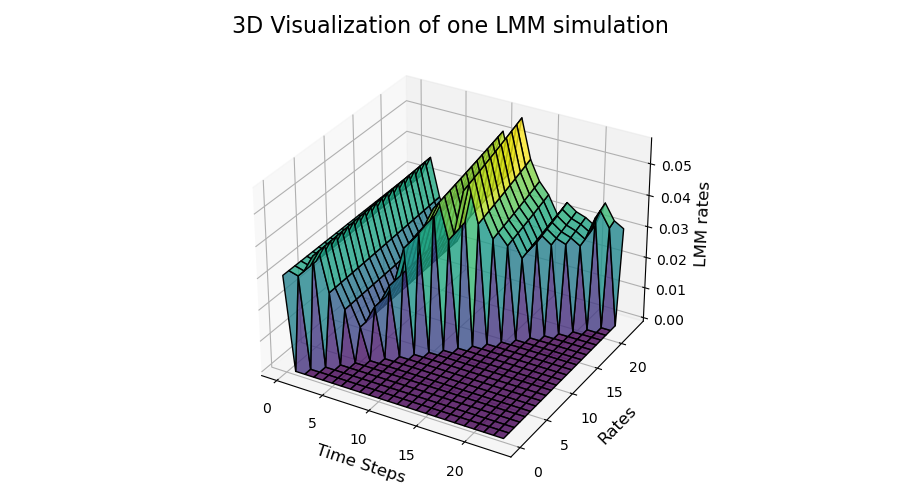

In [ ]:
#Plot one factor libor market model
num_steps = Libor_mean.shape[0]
num_rates = Libor_mean.shape[1]
#print(Libor_mean)

# Create a 3D surface plot
time_steps = np.arange(num_steps)
rates = np.arange(num_rates)
X, Y = np.meshgrid(time_steps, rates)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

# Plot the forward rates as a surface
ax.plot_surface(X, Y, Libor3D[:,:,0], cmap="viridis", edgecolor="k", alpha=0.8)

# Axis labels
ax.set_title("3D Visualization of one LMM simulation", fontsize=16)
ax.set_xlabel("Time Steps", fontsize=12)
ax.set_ylabel("Rates", fontsize=12)
ax.set_zlabel("LMM rates", fontsize=12)

plt.tight_layout()
plt.show()

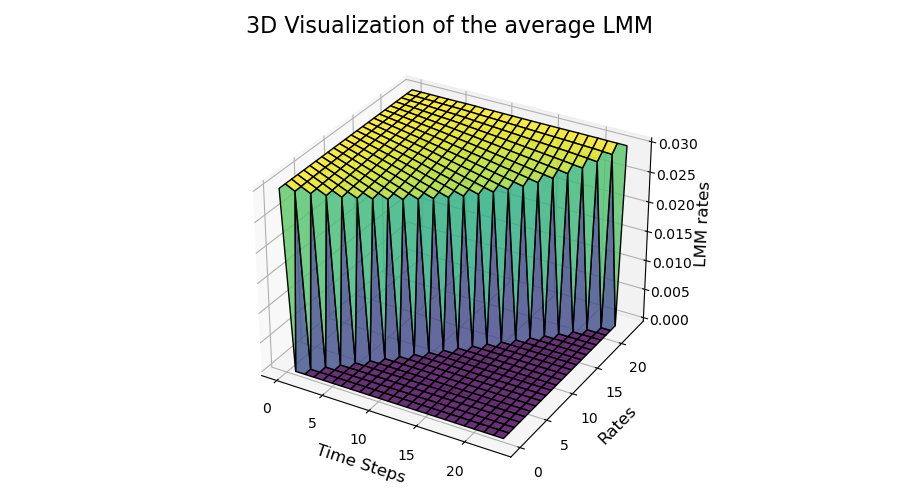

In [ ]:
#Plot one factor libor market model
num_steps = Libor_mean.shape[0]
num_rates = Libor_mean.shape[1]
#print(Libor_mean)

# Create a 3D surface plot
time_steps = np.arange(num_steps)
rates = np.arange(num_rates)
X, Y = np.meshgrid(time_steps, rates)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

# Plot the forward rates as a surface
ax.plot_surface(X, Y, Libor_mean, cmap="viridis", edgecolor="k", alpha=0.8)

# Axis labels
ax.set_title("3D Visualization of the average LMM", fontsize=16)
ax.set_xlabel("Time Steps", fontsize=12)
ax.set_ylabel("Rates", fontsize=12)
ax.set_zlabel("LMM rates", fontsize=12)

plt.tight_layout()
plt.show()

ZCB dim= (24, 200000) LMM dim= (24, 24, 200000)
mean of ZCB= [1.         0.97087379 0.94259591 0.91514166 0.88848705 0.86260878
 0.83748426 0.81309151 0.78940923 0.76641673 0.74409391 0.72242128
 0.70137988 0.68095134 0.66111781 0.64186195 0.62316694 0.60501645
 0.58739461 0.57028603 0.55367575 0.53754928 0.5218925  0.50669175]
FR0= [[0.03 0.03 0.03 ... 0.03 0.03 0.03]
 [0.03 0.03 0.03 ... 0.03 0.03 0.03]
 [0.03 0.03 0.03 ... 0.03 0.03 0.03]
 ...
 [0.03 0.03 0.03 ... 0.03 0.03 0.03]
 [0.03 0.03 0.03 ... 0.03 0.03 0.03]
 [0.03 0.03 0.03 ... 0.03 0.03 0.03]]


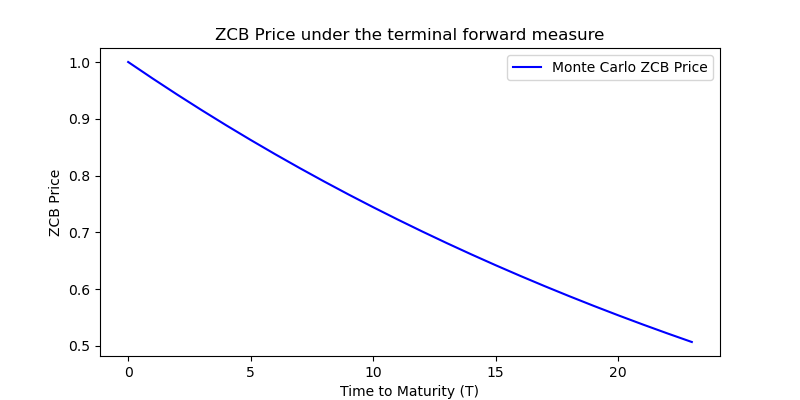

In [ ]:
#Numaraire
def ZCB_LMM(Libor, tau): # can only calculate for P(0,T)
    num_rates, _, N_sim = Libor.shape
    ZCB_mc = np.ones((num_rates, N_sim))

    for i in range(1, num_rates):
        ZCB_mc[i,:] =ZCB_mc[i-1,:]* 1/(1+tau * Libor[i-1, 0,:])
    return ZCB_mc

#Calculate the ZCB
ZCB_mc = ZCB_LMM(Libor3D, 1) #D(0,T)
print("ZCB dim=", ZCB_mc.shape, "LMM dim=", Libor3D.shape)
ZCB_mean = np.mean(ZCB_mc, axis=1) #P(0,T)
print("mean of ZCB=", ZCB_mean)

#Checks martingality
print("FR0=", ZCB_mc[:-1,:]/ZCB_mc[1:,:]-1)

plt.figure(figsize=(8, 4))
plt.plot(ZCB_mean, label='Monte Carlo ZCB Price', color="blue")
plt.xlabel('Time to Maturity (T)')
plt.ylabel('ZCB Price')
plt.title('ZCB Price under the terminal forward measure') #mucurio p.208, s. 256
plt.legend()
plt.show()

In [ ]:
#Numaraire t,T
def ZCB_t(Libor, tau, t):#Can calculate for P(t,T)
    num_rates, _, N_sim = Libor.shape
    P = np.ones((num_rates - t+1, N_sim))
    for i in range(t+1, num_rates+1):
        P[i-t, :] = P[i-t-1, :] / (1 + tau * Libor[i-1, t, :])
    return P 

def ZCB_test(Libor, tau, t): # can only calculate for P(0,T)
    num_rates, _, N_sim = Libor.shape
    ZCB_mc = np.ones((num_rates, N_sim))

    for i in range(1, num_rates):
        ZCB_mc[i, :] = ZCB_mc[i - 1, :] * 1 / (1 + (tau * Libor[i-1, t, :]))
    
    return ZCB_mc


Simulated caplet price = [0.0023510896138705327, 0.003236317163315258, 0.003831512188376046, 0.004296787004296096, 0.00465902762041581, 0.004935092273368002, 0.005180306908447276, 0.005254285459166344, 0.005400537957437308, 0.005521167243029452, 0.005585157158739232, 0.005725247780010559, 0.005733301752687465, 0.005858324173630374, 0.005730165493375426, 0.005650257335207116, 0.0056457106413182225, 0.0056435714020842895, 0.005645509262700087, 0.005613620362103405, 0.005569458759946004, 0.005553613839261112, 0.00554415089376088]
cap sim price = 0.1181642122865463
Correct BS caplet price = [0.002320068190894905, 0.0031802125370426625, 0.003775227569120528, 0.004225273515492246, 0.00457881523009263, 0.0048616981028844096, 0.005089868784891748, 0.005274104412851259, 0.005422157214002828, 0.005539861774925321, 0.005631762154312023, 0.005701492717911055, 0.005752022412094559, 0.005785818512101977, 0.005804960459720192, 0.0058112214604539225, 0.005806128515567582, 0.005791007592741145, 0.00576

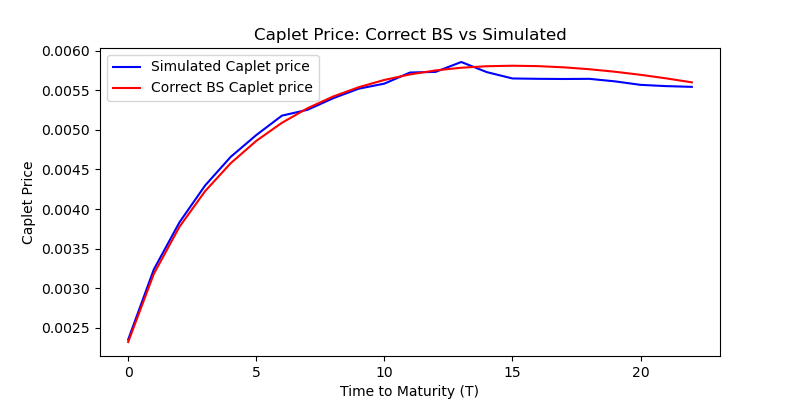

In [ ]:
#Sim Caplet price
sim_caplet = []
for k in range(1,lenlibor+1): #k=<23<24=M
    K = 0.03
    payoff = np.maximum((Libor3D[k,k,:]-K),0)
    sim_caplet.append(1 * np.mean(ZCB_mc[-1,:])* np.mean(payoff/ZCB_test(Libor3D, 1, k)[-1])) #/ZCB_t(Libor3D, tau, k)[-1]) #tau=1 ZCB_mean[i] #ZCB_leg(Libor3D,1, i+1)
print("Simulated caplet price =", sim_caplet)
print("cap sim price =", sum(sim_caplet))

#BS Caplet price (True caplet price)
def Black76(L,K,T,sigma): #BS pricing fomula
    d1 = (np.log(L/K)+ 0.5*sigma**2*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return L*norm.cdf(d1)- K*norm.cdf(d2)

def caplet(L,K,T,sigma, ZCB): #BS price of a caplet 
    return ZCB * 1 * Black76(L,K,T,sigma) #tau=1 

Correct_caplet = [] #np.zeros((lenlibor, len(Libor3D[0,0,:])))
for k in range(1,lenlibor+1): #k=<23<24=M
    K = 0.03
    Correct_caplet.append(caplet(Libor_mean[k,0], K, k, FR_vol[k], ZCB_mean[k])) #Libor3D[i,0,0] = 0.03
print("Correct BS caplet price =", Correct_caplet)
print("Correct BS cap price =", sum(Correct_caplet))

#Difference between MC and BS
print("Difference in caplet price =", np.array(Correct_caplet) - np.array(sim_caplet))
print("Difference cap=", sum(Correct_caplet) - sum(sim_caplet))


plt.figure(figsize=(8, 4))
plt.plot(sim_caplet, label='Simulated Caplet price', color="blue")
plt.plot(Correct_caplet, label='Correct BS Caplet price', color="red")
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Caplet Price')
plt.title('Caplet Price: Correct BS vs Simulated')
plt.legend()

Implied volatility= [0.20268329 0.20355261 0.20301247 0.20343172 0.20356421 0.20308183
 0.20364008 0.1992282  0.19917835 0.19930226 0.19828369 0.20086766
 0.19932027 0.20262905 0.19729301 0.19416859 0.1941645  0.1946043
 0.19551825 0.19547681 0.19522957 0.19627902 0.19780537]
Difference in IV and FR vol= [-0.00268329 -0.00355261 -0.00301247 -0.00343172 -0.00356421 -0.00308183
 -0.00364008  0.0007718   0.00082165  0.00069774  0.00171631 -0.00086766
  0.00067973 -0.00262905  0.00270699  0.00583141  0.0058355   0.0053957
  0.00448175  0.00452319  0.00477043  0.00372098  0.00219463]


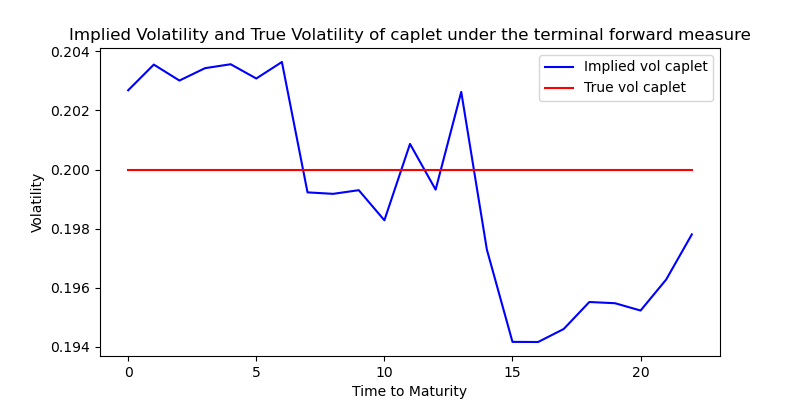

In [ ]:
def imp_vol_bach_to_BS_updated(L, K, T, dis, market_price):
    try:
        sigma_black = brentq(lambda sigma: caplet(L,K,T,sigma, dis) - market_price, 1e-3, 10.0)
        return sigma_black
    except ValueError:
        return 0  # Return 0 if no root is found

implied_vol = np.zeros(len(sim_caplet))
for k in range(1, len(sim_caplet)+1):
    market_price = sim_caplet[k-1]
    implied_vol[k-1] = imp_vol_bach_to_BS_updated(Libor_mean[k,0], 0.03, k, ZCB_mean[k], market_price)#ZCB_cap_0[i+1] for -drift?
    
#print(len(sim_caplet), Libor_mean.shape, len(implied_vol))
print("Implied volatility=", implied_vol)

print("Difference in IV and FR vol=", FR_vol[:-1]-implied_vol)

#Plot of the volatility
plt.figure(figsize=(8, 4))
plt.plot(implied_vol, label='Implied vol caplet', color="blue")
plt.plot(FR_vol[:-1], label='True vol caplet', color="red")
plt.xlabel('Time to Maturity')
plt.ylabel('Volatility')
plt.title('Implied Volatility and True Volatility of caplet under the terminal forward measure')
plt.legend()
  

In [ ]:
print(100*(implied_vol-0.2)/implied_vol)
print(np.min(100*(implied_vol-0.2)/implied_vol),np.max(100*(implied_vol-0.2)/implied_vol))
print(100*(implied_vol-0.2))

[ 1.32388542  1.74530236  1.4838834   1.68691289  1.75090193  1.5175308
  1.78750445 -0.38739698 -0.41251918 -0.35009214 -0.86558371  0.43195824
 -0.34102318  1.29747182 -1.37206674 -3.00327013 -3.00543919 -2.77265103
 -2.29224167 -2.31392761 -2.4434967  -1.89575795 -1.10948737]
-3.005439188384349 1.7875044543177527
[ 0.26832946  0.35526085  0.30124683  0.34317158  0.35642097  0.30818293
  0.36400754 -0.0771804  -0.08216489 -0.06977415 -0.17163113  0.08676644
 -0.06797283  0.26290549 -0.27069917 -0.58314073 -0.58354961 -0.53956982
 -0.44817508 -0.45231918 -0.47704281 -0.37209752 -0.21946256]


In [ ]:
#forward swap rate using eq. (6.33) Mercurio, such that the Libor rates are used
#remember max(t)=alpha, since the price of the swap needs to be set at that time. 
def swaprate_ab(L, t, alpha, beta): 
    tau = 1#assume tau=1 
    prod_ab = 1
    
    for j in range(alpha + 1, alpha + beta +1): #(alpha + beta + 1) since python goes to  (alpha + beta + 1)-1
        prod_ab *= 1 / (1 + tau * L[j,t]) #from (6.33)
    
    sum_ab = 0
    #print(alpha+1, beta)
    for i in range(alpha + 1, alpha + beta+1): #+1?#(alpha + beta + 1) since python goes to  (alpha + beta + 1)-1
        prod_ai = 1
        #print("i=", i)
        for j in range(alpha + 1, i+1): #+1?#(i + 1) since python goes to  (i + 1)-1
            #print("j=", j)
            prod_ai *= 1 / (1 + tau * L[j,t]) #FP
        sum_ab += tau * prod_ai #from eq. (6.33)
    
    return (1-prod_ab)/sum_ab # eq. (6.33)
print(f"Swap rate S_{{{2},{6}}}({0}):", np.mean(swaprate_ab(Libor3D, 7, 10, 10))) 

def weight_ai(L, t, i, alpha, beta): #assume tau=1
    tau = 1
    sum_ab = sum(ZCB_test(L, tau, t)[j] for j in range( alpha+1, alpha + beta+1))
    return 1*ZCB_test(L, tau, t)[i]/sum_ab

def swaprate_ab_ZCB(L, t, alpha, beta): 
    tau = 1 #assume tau=1 
    return sum(weight_ai(L, t, i, alpha, beta)*L[i,t,:] for i in range(alpha+1, alpha+beta+1))
print(f"Swap rate ZCB S_{{{2},{6}}}({0}):", np.mean(swaprate_ab_ZCB(Libor3D, 7, 10, 10))) 

#Swap rates are bassicly identical
print("Difference", np.mean(swaprate_ab(Libor3D, 5, 6, 10)-swaprate_ab_ZCB(Libor3D, 5, 6, 10)))

Swap rate S_{2,6}(0): 0.027958458172318724
Swap rate ZCB S_{2,6}(0): 0.02795927821079087
Difference -3.2997654105296565e-07


In [ ]:
#Annuity of a swap p. 240 s. 288 Mercurio
def C_ab(Libor, t, alpha, beta):
    tau =1
    P_val = ZCB_test(Libor, tau, t)[alpha+1:alpha + beta+1,:]
    return sum(P_val)
print(C_ab(Libor3D, 3, 5, 10).shape)
print(C_ab(Libor3D, 3,  5, 10))

(200000,)
[8.4603108  8.65533528 9.11501882 ... 8.36713756 8.29847871 8.2839472 ]


In [ ]:
#Test if C_ab is the numeraire p. 240 s. 288 Mercurio
#Check martingality of numariare
def check_martingale_swap(Libor, t, alpha, beta):
    tau = 1
    N_sim = Libor.shape[2]

    value = np.zeros((alpha, beta, N_sim))
    #S_ab(t)*C_ab(t)=P(t,T_alpha)-P(t,T_beta) p. 240 s. 288 Mercurio
    for i in range(1, alpha+1):
        for j in range(1, beta+1):
            ZCB_talpha = ZCB_test(Libor, tau, t)[i-t,:]
            ZCB_tbeta = ZCB_test(Libor, tau, t)[i+j-t,:]
            value[i-1, j-1,:] = (swaprate_ab(Libor, t, i, j) * C_ab(Libor, t, i, j) - ( ZCB_talpha- ZCB_tbeta))
    return value
'''
test = check_martingale_swap(Libor3D, 0, 10, 10)
test_mean = np.mean(test, axis = 2)
print("All of the values in the martingale check should be around 0:")
print("min and max for mean", np.min(test_mean), np.max(test_mean))
print("min and max for all sim", np.min(test), np.max(test))
print("Print of mean of the Martingale check:")
print(test_mean)
'''

'\ntest = check_martingale_swap(Libor3D, 0, 10, 10)\ntest_mean = np.mean(test, axis = 2)\nprint("All of the values in the martingale check should be around 0:")\nprint("min and max for mean", np.min(test_mean), np.max(test_mean))\nprint("min and max for all sim", np.min(test), np.max(test))\nprint("Print of mean of the Martingale check:")\nprint(test_mean)\n'

In [ ]:
#Calculate the swaption payoff with the monte carlo method
#eq. 6.36 (swap measure) chapter 6.10 Forward measure
def MC_swaptionpayoff(Libor, K, alpha, beta):
    numai = C_ab(Libor, alpha, alpha, beta)
    S_abT = swaprate_ab(Libor, alpha, alpha, beta)
    payoff = np.maximum(S_abT-K,0)*numai#6.51
    return payoff
#print(MC_swaptionpayoff(Libor3D, 0.02, 10, 1)) #K=0.02

#MC ATM swaption payoff K_ATM = S_alpha,beta(0) definition 1.6.2 p.21 s. 73
def MC_ATMswaptionpayoff(Libor, alpha, beta):
    KATM = swaprate_ab(Libor, 0, alpha, beta) #(ZCB[alpha] - ZCB[alpha + beta]) / np.sum(ZCB[i] for i in range(alpha+1, alpha+beta+1)) #swaprate_ab(Libor, 0, alpha, beta)
    ATM_payoff = MC_swaptionpayoff(Libor, KATM, alpha, beta)
    return ATM_payoff
#print(MC_ATMswaptionpayoff(Libor3D, 1, 1, ZCB_mean)) #K=ATM


def MC_ATMswaption(Libor, alpha, beta, ZCB):
    ATM_payoff = MC_ATMswaptionpayoff(Libor, alpha, beta)
    return ZCB[-1]*np.mean(ATM_payoff/ZCB_test(Libor, tau, alpha)[-1]) #LFM numariare (ZCB[alpha])


In [ ]:
def swaption_price_matrix(Libor, ZCB, max_index):
    # Initialize the swaption price matrix
    swaption_matrix = np.zeros((max_index-1, max_index-1))

    for alpha in range(1,max_index):
        #print(alpha)
        for beta in range(1,max_index):
                #print(beta)
                swaption_matrix[alpha-1, beta-1] = MC_ATMswaption(Libor, alpha, beta, ZCB)

    return swaption_matrix

# Example usage
max_index = 11 # 10x10
swaption_prices = swaption_price_matrix(Libor3D, ZCB_mean, max_index)
print("Swaption Price Matrix size:", swaption_prices.shape)
print("Swaption Price Matrix:", swaption_prices)

Swaption Price Matrix size: (10, 10)
Swaption Price Matrix: [[0.00228046 0.00449242 0.00663794 0.00871905 0.01073767 0.01269569
  0.01459493 0.01643715 0.01822408 0.01995737]
 [0.00313843 0.00618194 0.00913341 0.01199563 0.01477131 0.01746307
  0.02007345 0.0226049  0.0250598  0.02744049]
 [0.0037153  0.00731792 0.0108113  0.01419872 0.0174834  0.02066845
  0.02375689 0.02675162 0.02965549 0.03247128]
 [0.00416461 0.00820127 0.01211403 0.0159068  0.01958337 0.02314734
  0.02660223 0.02995148 0.03319836 0.03634598]
 [0.00451275 0.00888442 0.01311995 0.01722403 0.0212011  0.02505539
  0.02879089 0.03241144 0.03592065 0.03932204]
 [0.00478312 0.00941903 0.01391235 0.01826754 0.02248887 0.02658051
  0.0305464  0.03439048 0.03811648 0.04172807]
 [0.00501523 0.00987169 0.01457533 0.01913166 0.0235458  0.02782272
  0.03196706 0.03598311 0.03987497 0.04364673]
 [0.00509732 0.01004223 0.01483915 0.01949236 0.02400605 0.02838426
  0.03263084 0.03674952 0.04074407 0.04461811]
 [0.00523784 0.01031

In [ ]:
#Black-Scholes formula
def Blackscholes(S, K, sigma, T): #Proposition 6.4.1 Mecurio hvor v=sigma*np.sqrt(T) (eq. (6.19))
    d1 = (np.log(S/K)+ 0.5*T*sigma**2)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1)- K*norm.cdf(d2)

#Black-Scholes formula for ATM swaption
def swaption_BS_ATM(L, sigma, alpha, beta): #prop 6.7.1 Mercurio
    #C_ab_0 = np.sum([ZCB[i] for i in range(alpha+1, alpha + beta + 1)], axis=0) #p.240 s. 288
    C_ab_0 = np.mean(C_ab(L, 0, alpha, beta))
    #KATM = (ZCB[alpha]-ZCB[alpha+beta])/C_ab_0 #p.240 s. 288 #ZCB[alpha+beta+1] +1??? eller +0???
    S_ab = swaprate_ab(L, 0, alpha, beta)#np.mean(swaprate_ab_alt(L, 0, alpha, beta))#KATM #p. 394 s. 441 #(L, alpha, alpha, beta)???
    KATM = S_ab
    return C_ab_0 * np.mean(Blackscholes(S_ab, KATM, sigma, alpha)) #prop 6.7.1
#print(swaption_BS_ATM(Libor3D, 0.2, ZCB_mc, 4, 1))

In [ ]:
#Black squared volatilty, solve for implied volatility
def MCv_vol(L, ZCB, alpha, beta, market_price):
    try:
        sigma_black = brentq(lambda sigmajn: swaption_BS_ATM(L, sigmajn, alpha, beta) - market_price, 1e-32, 1.0)
        return sigma_black
    except ValueError:
        return 0  # Return 0 if no root is found

#Example usage
def ImpVol_matrix(L, ZCB, max_index):
    # Initialize the swaption price matrix
    ImpvolV_matrix = np.zeros((max_index, max_index))

    for alpha in range(1,max_index+1):
        for beta in range(1,max_index+1):
                MCprice = np.mean(MC_ATMswaption(L, alpha, beta, ZCB))
                ImpvolV_matrix[alpha-1, beta-1] = MCv_vol(L, ZCB, alpha, beta, MCprice)#np.sqrt(alpha)

                #print("Market price=", MCprice)
                #print("Implied volatility", MCv_vol(L, ZCB, alpha, beta, MCprice))

    return ImpvolV_matrix

# Example usage
max_index = 10
IV_matrix = ImpVol_matrix(Libor3D, ZCB_mc, max_index)

print("The Black implied volatility matrix under the LFM measure:")
print(IV_matrix.shape)
print(IV_matrix)


The Black implied volatility matrix under the LFM measure:
(10, 10)
[[0.20249135 0.20239747 0.20230488 0.2022136  0.20212365 0.20203484
  0.2019471  0.20186049 0.20177497 0.20169056]
 [0.20331606 0.20320003 0.20308535 0.20297197 0.20286013 0.20274973
  0.20264063 0.20253273 0.202426   0.20232057]
 [0.20275784 0.20263308 0.20250978 0.20238761 0.20226673 0.20214694
  0.20202855 0.20191118 0.20179503 0.2016803 ]
 [0.20308433 0.20291736 0.20275446 0.20259521 0.2024396  0.20228713
  0.20213773 0.20199147 0.20184813 0.20170726]
 [0.20307972 0.20285601 0.20264297 0.20243972 0.2022454  0.20205901
  0.2018794  0.20170599 0.20153758 0.20137387]
 [0.20272585 0.20255231 0.20238231 0.20221527 0.20205092 0.20188908
  0.20172934 0.201572   0.20141677 0.20126377]
 [0.20305138 0.2027841  0.20253331 0.20229626 0.2020708  0.20185636
  0.20165156 0.20145465 0.2012644  0.2010806 ]
 [0.19907064 0.19899035 0.19890913 0.19882668 0.1987433  0.19865895
  0.19857301 0.19848531 0.19839635 0.19830628]
 [0.19896714

In [ ]:
print(np.max(IV_matrix), np.min(IV_matrix))

0.20331606452964007 0.19805084249501076


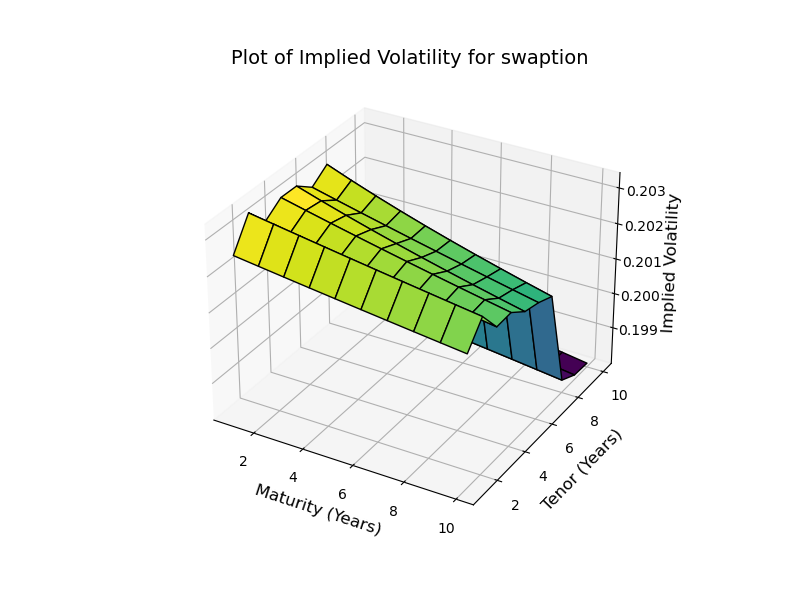

In [ ]:
# Setting up the grid for maturities and tenors
maturities = np.arange(1, IV_matrix.shape[0] + 1)
tenors = np.arange(1, IV_matrix.shape[1] + 1)

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(maturities, tenors)

# Plotting the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, IV_matrix, cmap='viridis', edgecolor='k') #skal imp

# Adding labels and title
ax.set_title('Plot of Implied Volatility for swaption', fontsize=14)
ax.set_xlabel('Maturity (Years)', fontsize=12)
ax.set_ylabel('Tenor (Years)', fontsize=12)
ax.set_zlabel('Implied Volatility', fontsize=12)

# Color bar to indicate the scale of implied volatility
#fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Implied Volatility')

plt.show()

In [ ]:
#Proposition 6.15.1. (Rebonatos formula)
def weight_reb(i, alpha, beta, ZCB): #assume tau=1
    sum_ab = sum(ZCB[j] for j in range( alpha+1, alpha + beta+1))
    return 1*ZCB[i]/sum_ab

def Rebonato_vol(L, alpha, beta, sigma, ZCB):
    sum_ = 0 
    sum_ = sum(weight_reb(i, alpha, beta, ZCB) * weight_reb(j, alpha, beta, ZCB) 
               * L[i,0] * L[j,0]*sigma[i]*sigma[j]*1 
               for i in range(alpha+1, alpha + beta + 1) 
               for j in range(alpha+1, alpha + beta + 1))
    
    S = swaprate_ab(L, 0, alpha, beta)

    return sum_/(S**2)

def Rebonato_matrix(L, ZCB, vol, max_index):
    # Initialize the swaption price matrix
    ImpvolV_matrix = np.zeros((max_index, max_index))

    for alpha in range(1, max_index+1):
        for beta in range(1, max_index+1):
                ImpvolV_matrix[alpha-1, beta-1] = np.sqrt(Rebonato_vol(L, alpha, beta, vol, ZCB))

    return ImpvolV_matrix


Rebonato_matrix_vol = Rebonato_matrix(Libor_mean, ZCB_mean, FR_vol, 10)
print("swap_vol=", Rebonato_matrix_vol)

swap_vol= [[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]]


Text(0.5, 0, 'Implied Volatility')

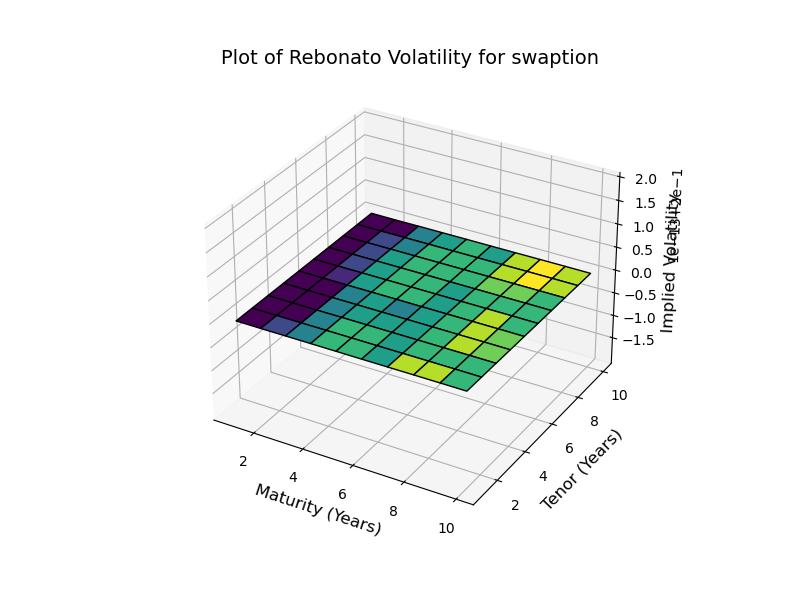

In [ ]:
# Setting up the grid for maturities and tenors
maturities = np.arange(1, Rebonato_matrix_vol.shape[0] + 1)
tenors = np.arange(1, Rebonato_matrix_vol.shape[1] + 1)

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(maturities, tenors)

# Plotting the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Rebonato_matrix_vol, cmap='viridis', edgecolor='k') #skal imp

# Adding labels and title
ax.set_title('Plot of Rebonato Volatility for swaption', fontsize=14)
ax.set_xlabel('Maturity (Years)', fontsize=12)
ax.set_ylabel('Tenor (Years)', fontsize=12)
ax.set_zlabel('Implied Volatility', fontsize=12)

Abseloute value difference= [[24.91354293 23.97474411 23.04876169 22.13597992 21.23645536 20.34842703
  19.47099616 18.60487543 17.74972134 16.90558091]
 [33.1606453  32.00033451 30.8534715  29.7196874  28.60130696 27.49734937
  26.40631067 25.3272959  24.26002715 23.20568193]
 [27.57844543 26.33078387 25.0978259  23.87607349 22.66729954 21.46941879
  20.28552413 19.1118097  17.95029391 16.80295458]
 [30.84328348 29.17355979 27.54455076 25.95212975 24.39604068 22.87132782
  21.37728432 19.91465239 18.48132638 17.07259724]
 [30.79718735 28.56006565 26.42969412 24.39715898 22.45395808 20.59009002
  18.79400329 17.05986141 15.37584525 13.73866325]
 [27.25845757 25.52312383 23.82305811 22.15269518 20.50915044 18.89076679
  17.29335876 15.71996627 14.16769856 12.637661  ]
 [30.5137906  27.84098034 25.33314686 22.96258301 20.7079909  18.56358367
  16.51564405 14.54651893 12.64402408 10.8059621 ]
 [ 9.29364759 10.09649325 10.90869377 11.73323236 12.56702434 13.41045236
  14.26988845 15.146949

Text(0.5, 0, 'Tenor')

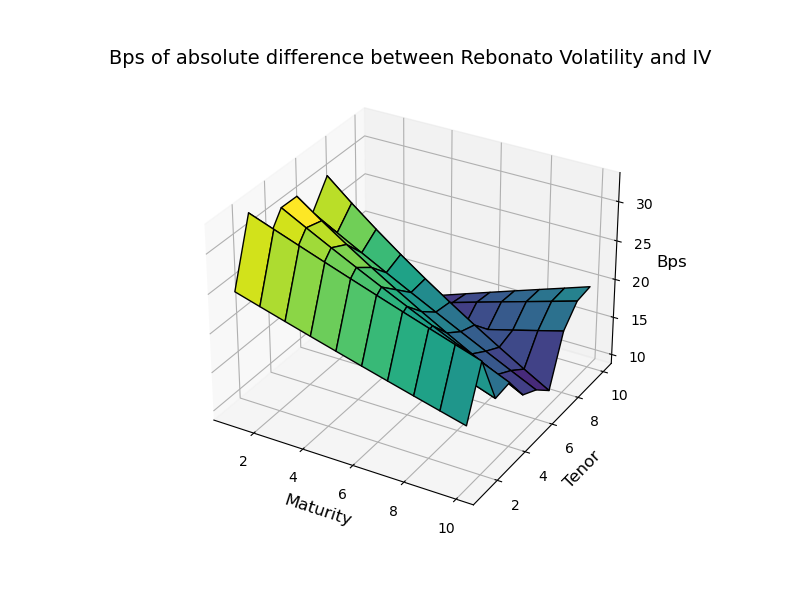

In [ ]:
absReb_IV =  np.abs(IV_matrix- Rebonato_matrix_vol)*10000
print("Abseloute value difference=",absReb_IV)
print(np.min(absReb_IV), np.max(absReb_IV)) #1130.1956468411017 for FR_vol =0.4, FR_0=0.03
# Setting up the grid for maturities and tenors
maturities = np.arange(1, absReb_IV.shape[0] + 1)
tenors = np.arange(1, absReb_IV.shape[1] + 1)

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(maturities, tenors)

# Plotting the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, absReb_IV, cmap='viridis', edgecolor='k') #skal imp

# Adding labels and title
ax.set_title('Bps of absolute difference between Rebonato Volatility and IV', fontsize=14)
ax.set_zlabel('Bps', fontsize=12)
ax.set_xlabel('Maturity', fontsize=12)
ax.set_ylabel('Tenor', fontsize=12)

Percentwise difference= [[ 1.23035095  1.18453771  1.13930826  1.09468305  1.05066655  1.00717415
   0.9641632   0.92166999  0.87967904  0.83819397]
 [ 1.63098993  1.57481935  1.51923671  1.4642262   1.40990282  1.35622122
   1.30311036  1.25052854  1.19846397  1.14697592]
 [ 1.36016663  1.29943167  1.23933894  1.17972013  1.12066377  1.06206993
   1.00409194  0.94654539  0.88953102  0.83314805]
 [ 1.51874267  1.43770648  1.35851766  1.28098435  1.20510217  1.13063681
   1.05756033  0.98591554  0.91560552  0.8464047 ]
 [ 1.51650729  1.40789845  1.30424925  1.20515675  1.11023334  1.01901371
   0.93095201  0.84577864  0.76292694  0.68224658]
 [ 1.34459706  1.26007566  1.17713147  1.09550061  1.01504863  0.93570029
   0.85725552  0.77986856  0.70340213  0.62791536]
 [ 1.50276205  1.37293706  1.25081382  1.13509677  1.02478889  0.91964325
   0.81901889  0.72207411  0.62822953  0.53739457]
 [-0.46685176 -0.50738607 -0.54842599 -0.59012365 -0.63232444 -0.67504897
  -0.71862175 -0.76312701 -

Text(0.5, 0, 'Tenor')

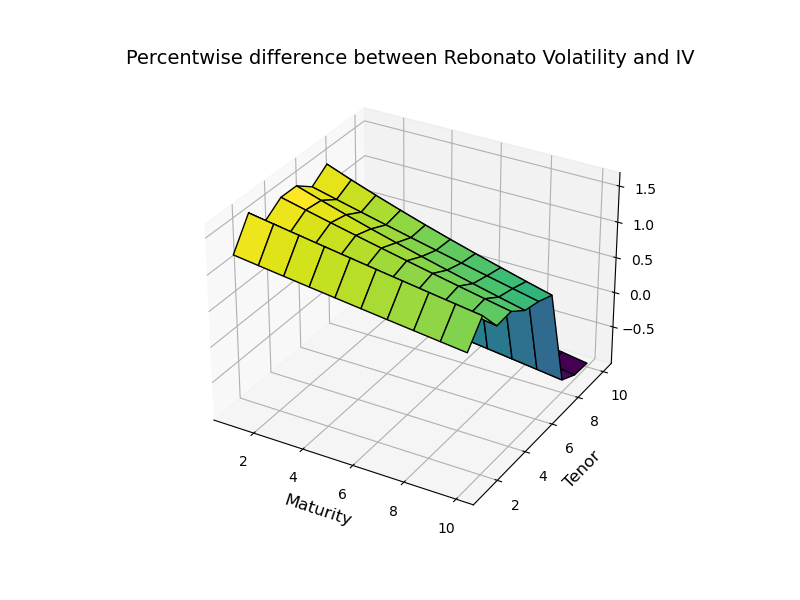

In [ ]:
Reb_IV =  100*(IV_matrix- Rebonato_matrix_vol)/IV_matrix
print("Percentwise difference=",Reb_IV)
print(np.max(np.abs(Reb_IV)))
#seed 69 max 1.5155699155542843 
#seed 8 max 1.6309899256172218
# Setting up the grid for maturities and tenors
maturities = np.arange(1, Reb_IV.shape[0] + 1)
tenors = np.arange(1, Reb_IV.shape[1] + 1)

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(maturities, tenors)

# Plotting the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Reb_IV, cmap='viridis', edgecolor='k') #skal imp

# Adding labels and title
ax.set_title('Percentwise difference between Rebonato Volatility and IV', fontsize=14)
ax.set_xlabel('Maturity', fontsize=12)
ax.set_ylabel('Tenor', fontsize=12)

Black-Scholes swaption price matrix size: (10, 10)
Black-Scholes swaption price matrix: [[0.00225249 0.00443938 0.00656257 0.00862392 0.01062523 0.01256825
  0.01445468 0.01628616 0.0180643  0.01979065]
 [0.00308758 0.00608524 0.00899559 0.01182116 0.01456444 0.01722782
  0.01981362 0.02232411 0.02476148 0.02712786]
 [0.00366527 0.00722378 0.01067865 0.01403289 0.01728944 0.02045113
  0.02352074 0.02650094 0.02939433 0.03220346]
 [0.00410221 0.00808493 0.01195166 0.01570576 0.01935052 0.02288912
  0.02632465 0.02966012 0.03289844 0.03604244]
 [0.00444545 0.00876142 0.01295169 0.01701991 0.02096963 0.02480432
  0.02852731 0.03214187 0.03565115 0.03905822]
 [0.0047201  0.00930271 0.01375185 0.01807141 0.02226515 0.02633675
  0.03028975 0.03412762 0.03785371 0.04147127]
 [0.00494162 0.00973931 0.01439726 0.01891954 0.02331011 0.02757279
  0.03171132 0.03572931 0.03963027 0.04341761]
 [0.00512049 0.01009184 0.01491839 0.01960437 0.02415385 0.02857083
  0.03285916 0.03702259 0.04106475 0.04

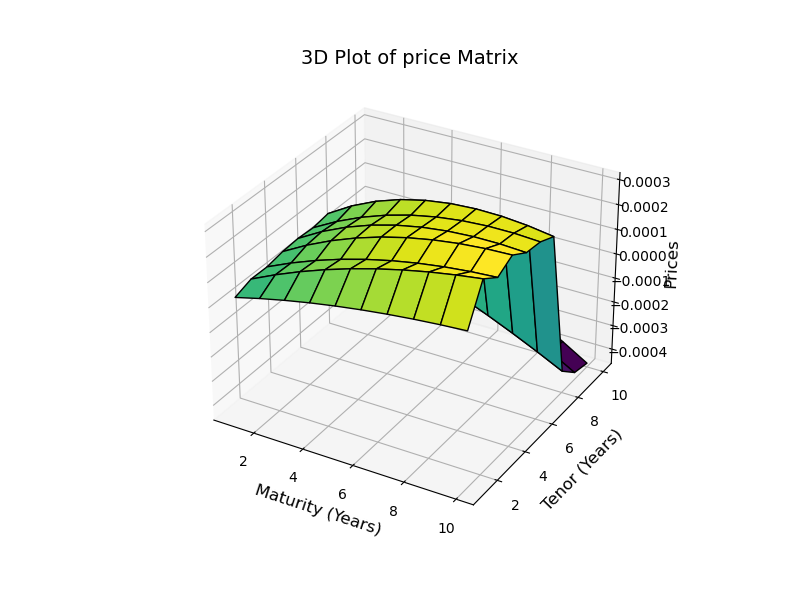

In [ ]:
#Example usage
def BSswaption_price_matrix(L, sigma, ZCB, max_index):
    # Initialize the swaption price matrix
    BSswaption_matrix = np.zeros((max_index-1, max_index-1))

    for alpha in range(1,max_index):
        for beta in range(1,max_index):
            BSswaption_matrix[alpha-1, beta-1] = swaption_BS_ATM(L, sigma[alpha-1, beta-1], alpha, beta) #sigma[alpha] do to Proposition 6.7.1.

    return BSswaption_matrix

# Example usage
max_index = 11 #10x10
BSswaption_prices = BSswaption_price_matrix(Libor3D, Rebonato_matrix_vol, ZCB_mc, max_index)
print("Black-Scholes swaption price matrix size:", BSswaption_prices.shape)
print("Black-Scholes swaption price matrix:", BSswaption_prices)

# Setting up the grid for maturities and tenors
maturities = np.arange(1, BSswaption_prices.shape[0] + 1)
tenors = np.arange(1, BSswaption_prices.shape[1] + 1)

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(maturities, tenors)

# Plotting the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
#surf = ax.plot_surface(X, Y, BSswaption_prices, cmap='viridis', edgecolor='k')
#surf = ax.plot_surface(X, Y, swaption_prices, cmap='plasma', edgecolor='k')
surf = ax.plot_surface(X, Y, swaption_prices-BSswaption_prices, cmap='viridis', edgecolor='k')

# Adding labels and title
ax.set_title('3D Plot of price Matrix', fontsize=14)
ax.set_xlabel('Maturity (Years)', fontsize=12)
ax.set_ylabel('Tenor (Years)', fontsize=12)
ax.set_zlabel('Prices', fontsize=12)

plt.show()

Swaption Price Matrix size: (10, 10)
Swaption Price Matrix: [[0.00228046 0.00449242 0.00663794 0.00871905 0.01073767 0.01269569
  0.01459493 0.01643715 0.01822408 0.01995737]
 [0.00313843 0.00618194 0.00913341 0.01199563 0.01477131 0.01746307
  0.02007345 0.0226049  0.0250598  0.02744049]
 [0.0037153  0.00731792 0.0108113  0.01419872 0.0174834  0.02066845
  0.02375689 0.02675162 0.02965549 0.03247128]
 [0.00416461 0.00820127 0.01211403 0.0159068  0.01958337 0.02314734
  0.02660223 0.02995148 0.03319836 0.03634598]
 [0.00451275 0.00888442 0.01311995 0.01722403 0.0212011  0.02505539
  0.02879089 0.03241144 0.03592065 0.03932204]
 [0.00478312 0.00941903 0.01391235 0.01826754 0.02248887 0.02658051
  0.0305464  0.03439048 0.03811648 0.04172807]
 [0.00501523 0.00987169 0.01457533 0.01913166 0.0235458  0.02782272
  0.03196706 0.03598311 0.03987497 0.04364673]
 [0.00509732 0.01004223 0.01483915 0.01949236 0.02400605 0.02838426
  0.03263084 0.03674952 0.04074407 0.04461811]
 [0.00523784 0.01031

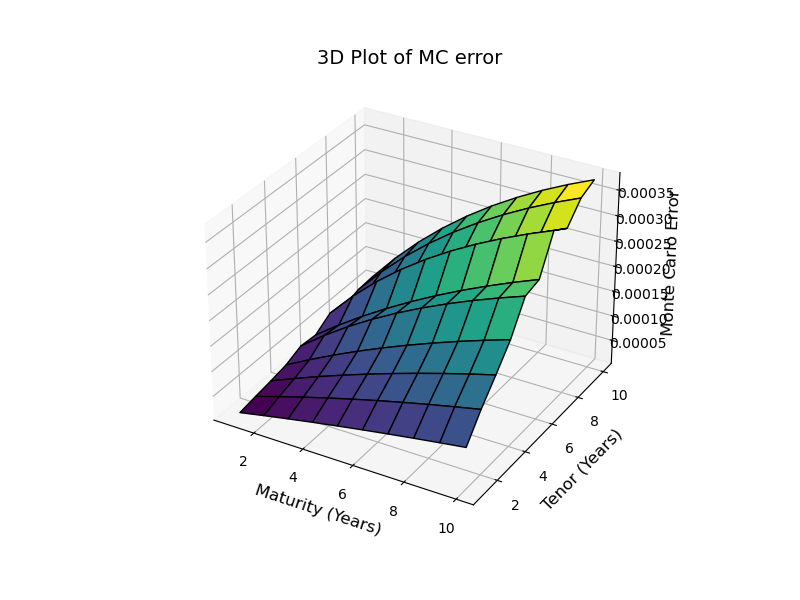

In [ ]:
#MCerr
def MCerr(Libor, alpha, beta, ZCB):
    ATM_payoff = MC_ATMswaptionpayoff(Libor, alpha, beta)
    return np.std(ZCB[-1]*ATM_payoff/ZCB_test(Libor, tau, alpha)[-1])/np.sqrt(Libor.shape[2])

def swaption_MCerr_matrix(Libor, ZCB, max_index):
    # Initialize the swaption price matrix
    swaption_matrix = np.zeros((max_index-1, max_index-1))

    for alpha in range(1,max_index):
        #print(alpha)
        for beta in range(1,max_index):
                #print(beta)
                swaption_matrix[alpha-1, beta-1] = MCerr(Libor, alpha, beta, ZCB)

    return swaption_matrix

# Example usage
max_index = 11 # 10x10
swaption_MCerr = swaption_MCerr_matrix(Libor3D, ZCB_mean, max_index)
print("Swaption Price Matrix size:", swaption_prices.shape)
print("Swaption Price Matrix:", swaption_prices)# Setting up the grid for maturities and tenors
maturities = np.arange(1, swaption_MCerr.shape[0] + 1)
tenors = np.arange(1, swaption_MCerr.shape[1] + 1)

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(maturities, tenors)

# Plotting the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, swaption_MCerr, cmap='viridis', edgecolor='k')

# Adding labels and title
ax.set_title('3D Plot of MC error', fontsize=14)
ax.set_xlabel('Maturity (Years)', fontsize=12)
ax.set_ylabel('Tenor (Years)', fontsize=12)
ax.set_zlabel('Monte Carlo Error', fontsize=12)

# Color bar to indicate the scale of implied volatility
#fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Implied Volatility')
plt.show()